In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import spatial_maps as sp
import septum_mec.analysis.data_processing as dp
import expipe
import os
import neo
import pathlib
import numpy as np
import elephant as el
import exdir
from scipy.interpolate import interp1d
import pandas as pd
import optogenetics as og
import quantities as pq
import pycwt
import exdir.plugins.quantities

19:40:36 [I] klustakwik KlustaKwik2 version 0.2.6


In [3]:
plt.rcParams['figure.figsize'] = (9, 6)

In [4]:
lfp = np.load('/home/mikkel/lfp_til_mikkel.npy')

In [5]:
lfp.shape

(32, 661621)

In [52]:
channel = 2

data = np.mean(lfp, axis=0)
    
sampling_rate = 1000

sampling_period = 1 / sampling_rate

times = np.arange(0, data.shape[0] / sampling_rate, 1 / sampling_rate)

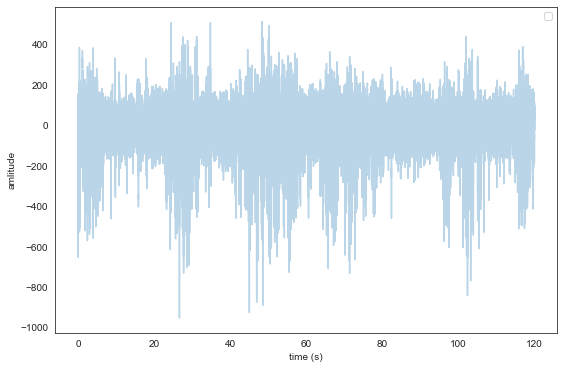

In [53]:
start_time = 0
stop_time = 120

mask = (start_time < times) & (times < stop_time) # seconds
plt.figure()
plt.plot(times[mask], data[mask], alpha=.3)
plt.ylabel('amlitude')
plt.xlabel('time (s)')
plt.legend()

(0, 50)

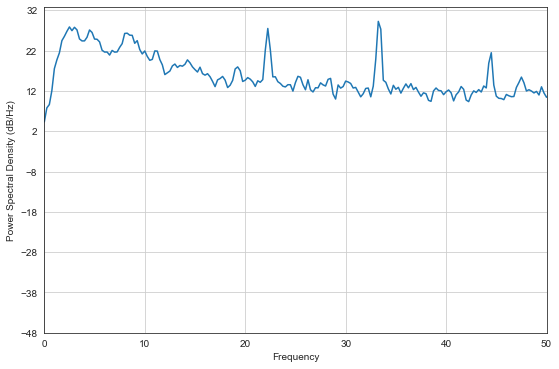

In [55]:
start_time = 60
stop_time = 120

mask = (start_time < times) & (times < stop_time) # seconds

plt.figure()
plt.psd(data[mask], Fs=sampling_rate, NFFT=4000)
plt.xlim(0,50)

In [48]:
def mask_coi(power, freqs, coi):
    periods = 1 / freqs
    for i in range(power.shape[1]):
        mask = periods > coi[i]
        power[mask, i] = np.nan

Text(0.5, 0, 'time (s)')

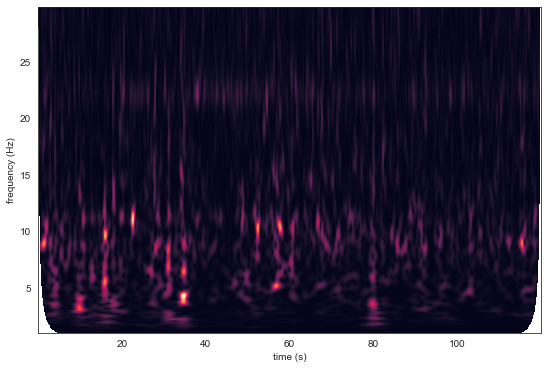

In [49]:
start_time = 0
stop_time = 120

mask = (start_time < times) & (times < stop_time) # seconds

mother = pycwt.Morlet(20) # Morlet size
freqs = np.arange(1, 30, .1) # Frequency range

wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(data[mask], sampling_period, freqs=freqs, wavelet=mother)

power = (np.abs(wave)) ** 2
power /= scales[:, None] #rectify the power spectrum according to suggestions proposed by Liu et al. (2007)

mask_coi(power, freqs, coi)

plt.figure()
plt.contourf(times[mask], freqs, power, levels=100)
    
plt.ylabel('frequency (Hz)')
plt.xlabel('time (s)')